In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
%matplotlib inline

In [2]:
LAYING_RAW_DATA_FILE = 'laying_grasps.csv'
STANDING_RAW_DATA_FILE = 'standing_grasps.csv'

NORM = 'stdnorm' # 'stdnorm', 'featurescaling'
DISTRIBUTION = 7
TYPE = 'known' # 'whole', 'known', 'unknown'
FILL_STRATEGY = 'cero2mean' # 'cero2lesscontact' 'cero2mean'
IMAGE_TYPE = '3d' # '3d', 'concat-horizontal', 'concat-vertical'

LABELS_OUT_FILE = 'labels-' + TYPE + '-t' + str(DISTRIBUTION) + '-' + FILL_STRATEGY + '-' \
                + NORM + '-' + IMAGE_TYPE + '.npy'
IMAGES_OUT_FILE = 'images-' + TYPE + '-t' + str(DISTRIBUTION) + '-' + FILL_STRATEGY + '-' \
                + NORM + '-' + IMAGE_TYPE + '.npy'

FINGERS = 3
TACTILE_IMAGE_ROWS = -1
TACTILE_IMAGE_COLS = -1
ELECTRODES_INDEX_ROWS = -1
ELECTRODES_INDEX_COLS = -1

if DISTRIBUTION == 1:
    TACTILE_IMAGE_ROWS = 8
    TACTILE_IMAGE_COLS = 9
    ELECTRODES_INDEX_ROWS = np.array([0, 1, 3, 3, 4, 4, 4, 5, 6, 7, 0, 1, 3, 3, 4, 4, 4, 5, 6, 7, 1, 2, 2, 3])
    ELECTRODES_INDEX_COLS = np.array([7, 6, 8, 7, 6, 8, 7, 5, 7, 7, 1, 2, 0, 1, 2, 0, 1, 3, 1, 1, 4, 5, 3, 4])
elif DISTRIBUTION == 2:
    TACTILE_IMAGE_ROWS = 8
    TACTILE_IMAGE_COLS = 7
    ELECTRODES_INDEX_ROWS = np.array([0, 0, 2, 2, 3, 3, 3, 4, 4, 5, 0, 0, 2, 2, 3, 3, 3, 4, 4, 5, 0, 1, 1, 2])
    ELECTRODES_INDEX_COLS = np.array([6, 5, 6, 5, 4, 6, 5, 4, 5, 5, 0, 1, 0, 1, 2, 0, 1, 2, 1, 1, 3, 4, 2, 3])
elif DISTRIBUTION == 3:
    TACTILE_IMAGE_ROWS = 6
    TACTILE_IMAGE_COLS = 7
    ELECTRODES_INDEX_ROWS = np.array([0, 0, 2, 2, 3, 3, 3, 4, 4, 5, 0, 0, 2, 2, 3, 3, 3, 4, 4, 5, 0, 1, 1, 2])
    ELECTRODES_INDEX_COLS = np.array([6, 5, 6, 5, 4, 6, 5, 4, 5, 5, 0, 1, 0, 1, 2, 0, 1, 2, 1, 1, 3, 4, 2, 3])
elif DISTRIBUTION == 4:
    TACTILE_IMAGE_ROWS = 4
    TACTILE_IMAGE_COLS = 7
    ELECTRODES_INDEX_ROWS = np.array([0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 0, 1, 1, 2])
    ELECTRODES_INDEX_COLS = np.array([6, 5, 6, 5, 4, 6, 5, 4, 5, 6, 0, 1, 0, 1, 2, 0, 1, 2, 1, 0, 3, 4, 2, 3])
elif DISTRIBUTION == 5:
    TACTILE_IMAGE_ROWS = 6
    TACTILE_IMAGE_COLS = 5
    ELECTRODES_INDEX_ROWS = np.array([0, 1, 2, 2, 3, 3, 4, 4, 5, 5, 0, 1, 2, 2, 3, 3, 4, 4, 5, 5, 0, 1, 1, 2])
    ELECTRODES_INDEX_COLS = np.array([4, 4, 4, 3, 3, 4, 4, 3, 3, 4, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 2, 3, 1, 2])
elif DISTRIBUTION == 6:
    TACTILE_IMAGE_ROWS = 6
    TACTILE_IMAGE_COLS = 5
    ELECTRODES_INDEX_ROWS = np.array([0, 0, 2, 2, 3, 3, 4, 4, 5, 5, 0, 0, 2, 2, 3, 3, 4, 4, 5, 5, 0, 1, 1, 2])
    ELECTRODES_INDEX_COLS = np.array([4, 3, 4, 3, 3, 4, 4, 3, 3, 4, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 3, 1, 2])
elif DISTRIBUTION == 7:
    TACTILE_IMAGE_ROWS = 12
    TACTILE_IMAGE_COLS = 11
    ELECTRODES_INDEX_ROWS = np.array([0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 2, 3, 3, 5])
    ELECTRODES_INDEX_COLS = np.array([1, 2, 0, 1, 3, 0, 1, 4, 2, 1, 9, 8, 10, 9, 7, 10, 9, 6, 8, 9, 5, 4, 6, 5])

In [3]:
laying_raw_df = pd.read_csv(LAYING_RAW_DATA_FILE)
standing_raw_df = pd.read_csv(STANDING_RAW_DATA_FILE)
whole_raw_df = pd.concat([laying_raw_df, standing_raw_df])

whole_raw_df.describe()

,slipped,ff_biotac_1,ff_biotac_2,ff_biotac_3,ff_biotac_4,ff_biotac_5,ff_biotac_6,ff_biotac_7,ff_biotac_8,ff_biotac_9,...,ffj4,mfj1,mfj2,mfj3,mfj4,thj1,thj2,thj3,thj4,thj5
count,2549.000000,2549.000000,2549.000000,2549.000000,2549.000000,2549.000000,2549.000000,2549.000000,2549.000000,2549.000000,...,2549.000000,2549.000000,2549.000000,2549.000000,2549.000000,2549.000000,2549.000000,2549.000000,2549.000000,2549.000000
mean,0.501765,2830.368772,3075.929384,3196.102785,3019.753629,2715.173794,2554.994508,2824.701844,2336.045900,2277.734013,...,-0.002457,0.276731,0.909609,0.454230,0.007649,0.006226,0.659161,0.208783,1.100880,-0.082937
std,0.500095,125.550345,108.155053,530.117536,161.080763,202.028945,239.250934,332.620979,583.571487,710.769351,...,0.015563,0.187840,0.197881,0.162288,0.025765,0.024353,0.053251,0.013578,0.043669,0.170738
min,0.000000,2074.000000,1955.000000,1988.000000,1506.000000,845.000000,1783.000000,368.000000,154.000000,98.000000,...,-0.061761,0.018474,0.465782,0.069760,-0.053829,-0.045752,0.228575,0.160750,1.016740,-0.479484
25%,0.000000,2753.000000,3030.000000,2794.000000,2954.000000,2662.000000,2381.000000,2723.000000,2026.000000,2018.000000,...,-0.011191,0.118426,0.725957,0.310211,-0.009091,-0.011539,0.649343,0.200356,1.067870,-0.221440
50%,1.000000,2842.000000,3094.000000,2988.000000,3046.000000,2771.000000,2542.000000,2901.000000,2483.000000,2504.000000,...,-0.003021,0.200376,0.977605,0.460124,0.001119,0.002227,0.668651,0.209902,1.090760,-0.087077
75%,1.000000,2924.000000,3143.000000,3954.000000,3126.000000,2844.000000,2748.000000,3028.000000,2819.000000,2812.000000,...,0.005113,0.445097,1.084480,0.577948,0.022175,0.016884,0.685965,0.218086,1.130530,0.053396
max,1.000000,3112.000000,3246.000000,3975.000000,3311.000000,2944.000000,3104.000000,3215.000000,2964.000000,3020.000000,...,0.063842,0.659297,1.198030,0.885681,0.106736,0.082056,0.729736,0.242082,1.289330,0.356695


Text(0,0.5,'grasps')

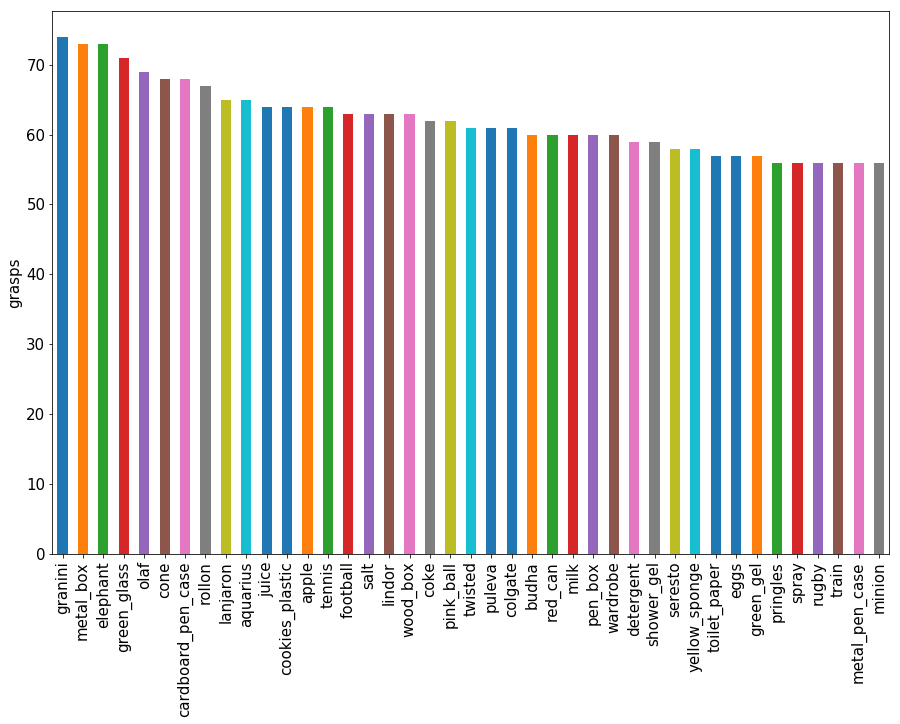

In [4]:
plt.figure()
whole_raw_df['object'].value_counts().plot(kind='bar', figsize=(15, 10), fontsize=15)
plt.ylabel('grasps', fontsize=15)
#plt.savefig('objects_distribution.eps', format='eps', dpi=300)

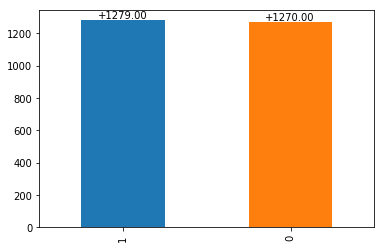

In [5]:
hist = whole_raw_df['slipped'].value_counts().plot(kind='bar')

x_offset = -0.15
y_offset = 10.00

for bar in hist.patches:
    b = bar.get_bbox()
    val = "{:+.2f}".format(b.y1 + b.y0)
    hist.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

# UNKNOWN VS KNOWN

In [6]:
unknown_objects = ['juice', 'aquarius', 'green_gel', 'tennis', 'football', 'milk', 'metal_pen_case', 'train']
#unknown_objects = ['metal_box', 'football', 'budha']

unknown_raw_df = whole_raw_df.loc[whole_raw_df['object'].isin(unknown_objects)]
known_raw_df = whole_raw_df.loc[~whole_raw_df['object'].isin(unknown_objects)]

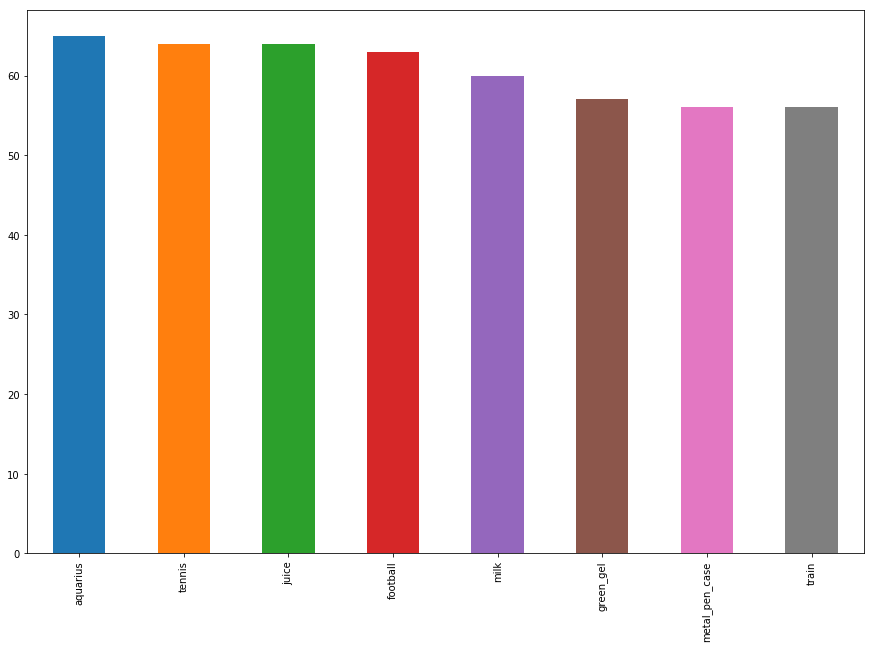

In [7]:
unknown_raw_df['object'].value_counts().plot(kind='bar', figsize=(15, 10))

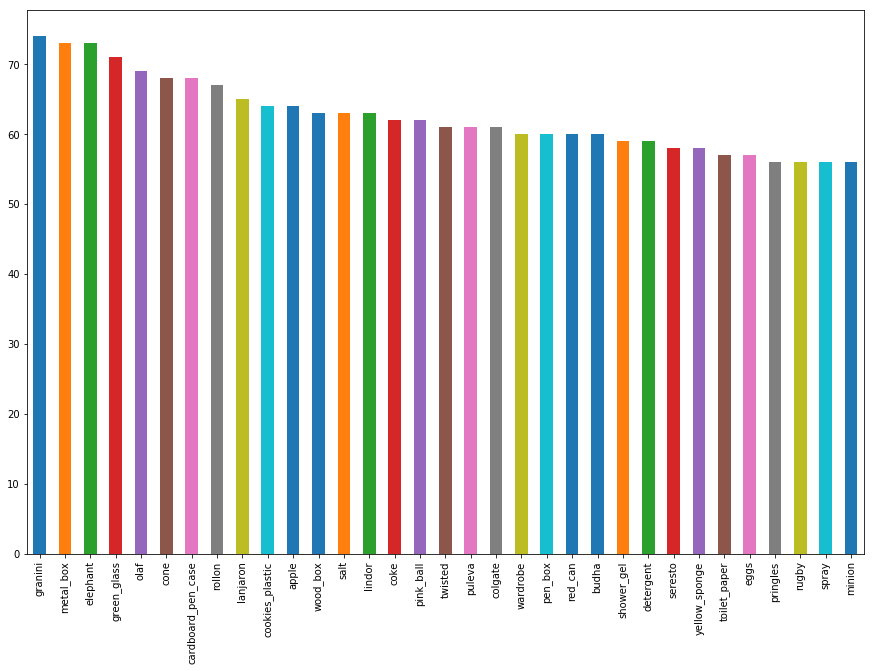

In [8]:
known_raw_df['object'].value_counts().plot(kind='bar', figsize=(15, 10))

# TACTILE IMAGES DATASET

In [24]:
# Returns the values of the 8 neighbours of a given cell.
# This method is meant to be called with the gaps in tactile cells.
def get_neighbours(tactile_image, cell_x, cell_y):
    pad = 2
    padded_x = cell_x + pad
    padded_y = cell_y + pad
    
    padded = np.pad(tactile_image, ((pad, pad), (pad, pad)), 'constant') #0s
    
    neighbours_xs = [padded_x - 1, padded_x - 1, padded_x - 1, 
                     padded_x, padded_x, 
                     padded_x + 1, padded_x + 1, padded_x + 1]
    neighbours_ys = [padded_y - 1, padded_y, padded_y + 1,
                     padded_y - 1, padded_y + 1,
                     padded_y - 1, padded_y, padded_y + 1]
    num_neighbours = len(neighbours_xs)
    neighbours = []
    
    for i in range(num_neighbours):
        some_x = neighbours_xs[i]
        some_y = neighbours_ys[i]
        neighbours.append(padded[some_x, some_y])

    return neighbours

def ceros_2_mean(tactile_image):
    prev_tactile_image = np.copy(tactile_image)
    cero_xs, cero_ys = np.where(tactile_image == 0)

    for i in range(len(cero_xs)):
        cell_x = cero_xs[i]
        cell_y = cero_ys[i]
        cell_neighs = get_neighbours(prev_tactile_image, cell_x, cell_y)
        cell_neighs = [value for value in cell_neighs if value > 0.0]

        if len(cell_neighs) > 0:
            tactile_image[cell_x, cell_y] = np.mean(cell_neighs)
            
    return tactile_image    

def create_finger_tactile_image(finger_biotac, normalization, fill_strategy=1):
    tactile_image = np.zeros(shape=(TACTILE_IMAGE_ROWS, TACTILE_IMAGE_COLS))
    tactile_image[ELECTRODES_INDEX_ROWS, ELECTRODES_INDEX_COLS] = finger_biotac
    
    if fill_strategy == 'cero2lesscontact':
        # Strategy 1 - Fill with less contacted value
        # The maximum value corresponds to the less contacted electrode
        max_value = np.max(finger_biotac)
        tactile_image[tactile_image == 0] = max_value
    elif fill_strategy == 'cero2mean':
        # Strategy 2 - Fill with neighbours average
        tactile_image = ceros_2_mean(tactile_image)
        
        # Repeat in case that there were cells with no values as neighbours, they will now
        if np.min(tactile_image) == 0.0:
            tactile_image = ceros_2_mean(tactile_image)
    
    if normalization == 'stdnorm':
        tactile_image = (tactile_image - np.mean(tactile_image)) / (np.std(tactile_image))
    elif normalization == 'featurescaling':
        tactile_image = (tactile_image - np.min(tactile_image)) / (np.max(tactile_image) - np.min(tactile_image))
    
    return tactile_image

def create_grasp_tactile_image(ff_image, mf_image, th_image, image_type='3d'):
    grasp_image = []
    
    if image_type == '3d': 
        grasp_image = np.array([ff_image, mf_image, th_image])
    elif image_type == 'concat-horizontal':
        grasp_image = np.concatenate((ff_image, mf_image, th_image), axis=1)
    elif image_type == 'concat-vertical':
        grasp_image = np.concatenate((ff_image, mf_image, th_image), axis=0)
    
    return grasp_image

# FOR CREATING UNKNOWN/KNOWN OR WHOLE
# Just change the dataframe used below
# whole_raw_df, known_raw_df, unknown_raw_df
labels = known_raw_df['slipped'].values
tactiles_df = known_raw_df[['ff_biotac_1', 'ff_biotac_2', 'ff_biotac_3', 'ff_biotac_4', 'ff_biotac_5', 
                   'ff_biotac_6', 'ff_biotac_7', 'ff_biotac_8', 'ff_biotac_9', 'ff_biotac_10', 'ff_biotac_11', 
                   'ff_biotac_12', 'ff_biotac_13', 'ff_biotac_14', 'ff_biotac_15', 'ff_biotac_16', 'ff_biotac_17', 
                   'ff_biotac_18', 'ff_biotac_19', 'ff_biotac_20', 'ff_biotac_21', 'ff_biotac_22', 'ff_biotac_23', 
                   'ff_biotac_24', 'mf_biotac_1', 'mf_biotac_2', 'mf_biotac_3', 'mf_biotac_4', 'mf_biotac_5', 
                   'mf_biotac_6', 'mf_biotac_7', 'mf_biotac_8', 'mf_biotac_9', 'mf_biotac_10', 'mf_biotac_11', 
                   'mf_biotac_12', 'mf_biotac_13', 'mf_biotac_14', 'mf_biotac_15', 'mf_biotac_16', 'mf_biotac_17', 
                   'mf_biotac_18', 'mf_biotac_19', 'mf_biotac_20', 'mf_biotac_21', 'mf_biotac_22', 'mf_biotac_23', 
                   'mf_biotac_24', 'th_biotac_1', 'th_biotac_2', 'th_biotac_3', 'th_biotac_4', 'th_biotac_5', 
                   'th_biotac_6', 'th_biotac_7', 'th_biotac_8', 'th_biotac_9', 'th_biotac_10', 'th_biotac_11', 
                   'th_biotac_12', 'th_biotac_13', 'th_biotac_14', 'th_biotac_15', 'th_biotac_16', 'th_biotac_17', 
                   'th_biotac_18', 'th_biotac_19', 'th_biotac_20', 'th_biotac_21', 'th_biotac_22', 'th_biotac_23', 
                   'th_biotac_24']]
   
if IMAGE_TYPE == '3d':
    tactile_images = np.zeros(shape=(tactiles_df.shape[0], FINGERS, TACTILE_IMAGE_ROWS, TACTILE_IMAGE_COLS))
    #tactile_images_flip = np.zeros(shape=(tactiles_df.shape[0], FINGERS, TACTILE_IMAGE_ROWS, TACTILE_IMAGE_COLS))
    #tactile_images_flip2 = np.zeros(shape=(tactiles_df.shape[0], FINGERS, TACTILE_IMAGE_ROWS, TACTILE_IMAGE_COLS))
    #tactile_images_rotate10 = np.zeros(shape=(tactiles_df.shape[0], FINGERS, TACTILE_IMAGE_ROWS, TACTILE_IMAGE_COLS))
    #tactile_images_rotate10m = np.zeros(shape=(tactiles_df.shape[0], FINGERS, TACTILE_IMAGE_ROWS, TACTILE_IMAGE_COLS))
elif IMAGE_TYPE == 'concat-horizontal':
    tactile_images = np.zeros(shape=(tactiles_df.shape[0], 1, TACTILE_IMAGE_ROWS, TACTILE_IMAGE_COLS * FINGERS))
elif IMAGE_TYPE == 'concat-vertical':
    tactile_images = np.zeros(shape=(tactiles_df.shape[0], 1, TACTILE_IMAGE_ROWS * FINGERS, TACTILE_IMAGE_COLS))

for sample in range(tactiles_df.shape[0]):
    one_grasp = tactiles_df.iloc[sample].values

    ff_image = create_finger_tactile_image(one_grasp[0:24], normalization=NORM, fill_strategy=FILL_STRATEGY)
    mf_image = create_finger_tactile_image(one_grasp[24:48], normalization=NORM, fill_strategy=FILL_STRATEGY)
    th_image = create_finger_tactile_image(one_grasp[48:], normalization=NORM, fill_strategy=FILL_STRATEGY)
    tactile_images[sample] = create_grasp_tactile_image(ff_image, mf_image, th_image, image_type=IMAGE_TYPE)
    #tactile_images_flip[sample] = create_grasp_tactile_image(np.fliplr(ff_image), np.fliplr(mf_image), 
    #                                                         np.fliplr(th_image), image_type=IMAGE_TYPE)
    #tactile_images_flip2[sample] = create_grasp_tactile_image(np.flipud(ff_image), np.flipud(mf_image), 
    #                                                         np.flipud(th_image), image_type=IMAGE_TYPE)
    #tactile_images_rotate10[sample] = create_grasp_tactile_image(rotate(ff_image, 10, reshape=False, mode='nearest'),
    #                                                             rotate(mf_image, 10, reshape=False, mode='nearest'),
    #                                                             rotate(th_image, 10, reshape=False, mode='nearest'),
    #                                                             image_type=IMAGE_TYPE)
    #tactile_images_rotate10m[sample] = create_grasp_tactile_image(rotate(np.fliplr(ff_image), 10, reshape=False, mode='nearest'),
    #                                                             rotate(np.fliplr(mf_image), 10, reshape=False, mode='nearest'),
    #                                                             rotate(np.fliplr(th_image), 10, reshape=False, mode='nearest'),
    #                                                             image_type=IMAGE_TYPE)

some_grasp = 0
print(labels[some_grasp])
print(tactile_images[some_grasp])

#whole_labels = np.concatenate((labels, labels, labels, labels, labels), axis=0)
#whole_images = np.concatenate((tactile_images, tactile_images_flip, tactile_images_flip2, 
#                               tactile_images_rotate10, tactile_images_rotate10m), axis=0)
whole_labels = labels
whole_images = tactile_images

np.save(LABELS_OUT_FILE, arr=whole_labels)
np.save(IMAGES_OUT_FILE, arr=whole_images)

0
[[[ 0.20416431  0.20416431  0.48778092  0.77139752  0.79018008
    0.80896263  0.73852805  0.66809346  0.27647716 -0.11513915
   -0.11513915]
  [ 0.20416431  0.48778092  0.77139752  0.77139752  0.80896263
    0.80896263  0.80896263  0.66809346  0.66809346  0.27647716
   -0.11513915]
  [ 1.25260662  0.77139752  0.77139752  0.77515403  0.79393659
    0.80896263  0.72256287  0.65212829  0.66809346  0.66809346
    0.12133324]
  [ 2.39984517  2.39984517  1.11429657  0.77891054  0.77891054
    0.74134543  0.63616311  0.63616311  0.39750725 -0.11138264
   -0.11138264]
  [ 2.39984517  1.67953413  0.95922309  0.77891054  0.58075457
    0.59922409  0.50938086  0.63616311  0.05766037 -0.02686113
   -0.11138264]
  [ 1.67953413  0.95922309  0.62301532  0.28680756  0.33470308
    0.3825986  -0.28793867 -0.95847593 -0.45040778  0.05766037
   -0.02686113]
  [ 0.43143325  0.43143325  0.62301532  0.28680756  0.33470308
    0.3825986  -0.28793867 -0.95847593 -0.45040778 -0.08226967
   -0.08226967]
  [-

In [25]:
print(whole_labels.shape)
print(whole_images.shape)

(10320,)
(10320, 3, 12, 11)


2064


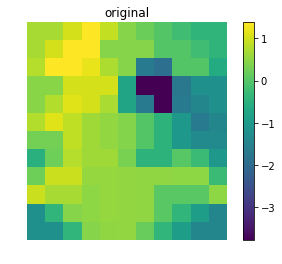

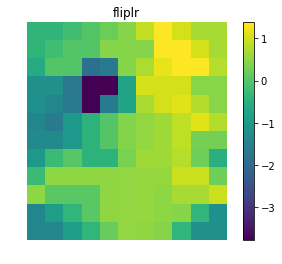

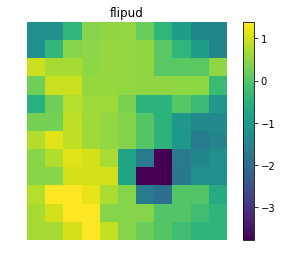

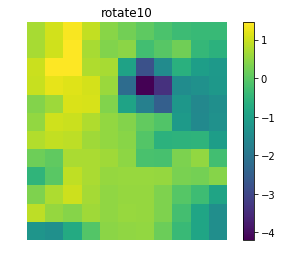

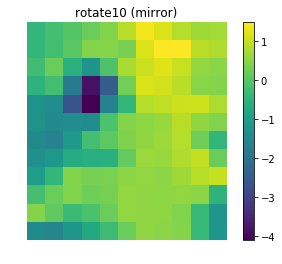

In [27]:
unique = int(whole_images.shape[0] / 5)

print(unique)

index = 2063

plt.figure()
plt.imshow(whole_images[0 * unique + index, 0, :, :], interpolation='nearest', )
plt.axis('off')
plt.title('original')
plt.colorbar()

plt.figure()
plt.imshow(whole_images[1 * unique + index, 0, :, :], interpolation='nearest', )
plt.axis('off')
plt.title('fliplr')
plt.colorbar()

plt.figure()
plt.imshow(whole_images[2 * unique + index, 0, :, :], interpolation='nearest', )
plt.axis('off')
plt.title('flipud')
plt.colorbar()

plt.figure()
plt.imshow(whole_images[3 * unique + index, 0, :, :], interpolation='nearest', )
plt.axis('off')
plt.title('rotate10')
plt.colorbar()

plt.figure()
plt.imshow(whole_images[4 * unique + index, 0, :, :], interpolation='nearest', )
plt.axis('off')
plt.title('rotate10 (mirror)')
plt.colorbar()